In [2]:
import pandas as pd
import numpy as np
import sqlite3
import math
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))
from datetime import datetime

koneksi = sqlite3.connect('dbDatawarehouse.db')
cursor = koneksi.cursor()

# Desain Database
<img src="PDM - TA.png">

In [2]:
cursor.executescript('drop table if exists customer')
cursor.executescript('drop table if exists produk')
cursor.executescript('drop table if exists transaksi')

cursor.execute("CREATE TABLE IF NOT EXISTS 'customer' ('id_customer' INT, 'jenis_customer' VARCHAR(10) NULL, 'jenis_kelamin' VARCHAR(10) NULL, PRIMARY KEY ('id_customer'))")
cursor.execute("CREATE TABLE IF NOT EXISTS 'produk' ('id_produk' INT, 'product_line' VARCHAR(30) NULL, 'harga' FLOAT NULL, 'rating' FLOAT NULL, PRIMARY KEY ('id_produk'))")
cursor.execute("CREATE TABLE IF NOT EXISTS 'transaksi' ('id_transaksi' INT, 'id_customer' INT, 'id_produk' INT, 'tanggal_transaksi' DATE NULL, 'jumlah_pembelian' INT NULL, 'jenis_pembayaran' VARCHAR(20) NULL, PRIMARY KEY ('id_transaksi'), FOREIGN KEY ('id_customer') REFERENCES 'customer' ('id_customer') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('id_produk') REFERENCES 'produk' ('id_produk') ON DELETE NO ACTION ON UPDATE NO ACTION)")

In [3]:
df = pd.read_csv("dataset_supermarket.csv", delimiter=',')
# print(df.dtypes)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [5]:
customer = []
produk = []

for i,j in df.iterrows():
#     if [j[1], j[2]] not in enumerate(cabang):
#         cabang.append([j[1],j[2]])
        
    if [j[5],j[6],j[16]] not in enumerate(produk):
        produk.append([j[5],j[6],j[16]])
    
    if [j[3],j[4]] not in enumerate(customer):
        customer.append([j[3],j[4]])
    
transaksi = []
for i,j in df.iterrows():   
    c = -1
    for index, value in enumerate(customer):
        if value[0] == j[3]:
            c = index+1
            break
            
    p = -1
    for index, value in enumerate(produk):
        if value[0] == j[5]:
#             print(value[0])
            p = index+1
            break
    
    transaksi.append([c, p ,datetime.strptime(j[10], '%m/%d/%Y').strftime('%Y-%m-%d'),j[7],j[12]]) 

In [6]:
cursor.execute("DELETE FROM CUSTOMER")
for index, i in enumerate(customer):
    cursor.execute("INSERT INTO CUSTOMER VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "' )")
#     cursor.execute("insert into customer values ({}, '{}', '{}')".format(i[0],i[1],i[2]))
    
cursor.execute("DELETE FROM PRODUK")
for index, i in enumerate(produk): 
    cursor.execute("INSERT INTO PRODUK VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "','" + str(i[2]) + "')")
#     cursor.execute("insert into produk values ({}, '{}', {}, {})".format(i[0],i[1],i[2],i[3]))

    
cursor.execute("DELETE FROM TRANSAKSI")
for index, i in enumerate(transaksi):
    id_customer = i[0]
    id_produk = i[1]
    cursor.execute("INSERT INTO TRANSAKSI VALUES(" + str(index+1) + ", " + str(id_customer) + "," + str(id_produk) + ",'" + str(i[2]) + "', '" + str(i[3]) + "', '" + str(i[4]) + "')")
#     cursor.execute("insert into transaksi values ({}, {}, {}, '{}', {}, '{}')".format(i[0],i[1],i[2],i[3],i[4],i[5]))
    
koneksi.commit()

In [7]:
#pengecekan apakah datawarehouse telah terisi

cursor.execute('''SELECT * FROM CUSTOMER''')

customer = []
for row in cursor.fetchall():
    customer.append(row)
print("================================================CUSTOMER========================================================")
print(customer)
print()

================================================CUSTOMER========================================================
[(1, 'Member', 'Female'), (2, 'Normal', 'Female'), (3, 'Normal', 'Male'), (4, 'Member', 'Male'), (5, 'Normal', 'Male'), (6, 'Normal', 'Male'), (7, 'Member', 'Female'), (8, 'Normal', 'Female'), (9, 'Member', 'Female'), (10, 'Member', 'Female'), (11, 'Member', 'Female'), (12, 'Member', 'Male'), (13, 'Normal', 'Female'), (14, 'Normal', 'Male'), (15, 'Normal', 'Female'), (16, 'Member', 'Female'), (17, 'Member', 'Female'), (18, 'Normal', 'Male'), (19, 'Normal', 'Male'), (20, 'Normal', 'Female'), (21, 'Member', 'Male'), (22, 'Normal', 'Male'), (23, 'Normal', 'Male'), (24, 'Normal', 'Male'), (25, 'Member', 'Male'), (26, 'Member', 'Female'), (27, 'Normal', 'Male'), (28, 'Normal', 'Female'), (29, 'Normal', 'Female'), (30, 'Normal', 'Male'), (31, 'Normal', 'Male'), (32, 'Member', 'Male'), (33, 'Normal', 'Male'), (34, 'Normal', 'Male'), (35, 'Member', 'Female'), (36, 'Member', 'Female'

In [8]:
cursor.execute('''SELECT * FROM PRODUK''')

produk = []
for row in cursor.fetchall():
    produk.append(row)
print("================================================PRODUK========================================================")
print(produk)
print()

================================================PRODUK========================================================
[(1, 'Health and beauty', 74.69, 9.1), (2, 'Electronic accessories', 15.28, 9.6), (3, 'Home and lifestyle', 46.33, 7.4), (4, 'Health and beauty', 58.22, 8.4), (5, 'Sports and travel', 86.31, 5.3), (6, 'Electronic accessories', 85.39, 4.1), (7, 'Electronic accessories', 68.84, 5.8), (8, 'Home and lifestyle', 73.56, 8.0), (9, 'Health and beauty', 36.26, 7.2), (10, 'Food and beverages', 54.84, 5.9), (11, 'Fashion accessories', 14.48, 4.5), (12, 'Electronic accessories', 25.51, 6.8), (13, 'Electronic accessories', 46.95, 7.1), (14, 'Food and beverages', 43.19, 8.2), (15, 'Health and beauty', 71.38, 5.7), (16, 'Sports and travel', 93.72, 4.5), (17, 'Health and beauty', 68.93, 4.6), (18, 'Sports and travel', 72.61, 6.9), (19, 'Food and beverages', 54.67, 8.6), (20, 'Home and lifestyle', 40.3, 4.4), (21, 'Electronic accessories', 86.04, 4.8), (22, 'Health and beauty', 87.98, 5.1), (2

In [9]:
cursor.execute('''SELECT * FROM TRANSAKSI''')
transaksi = []
for row in cursor.fetchall():
    transaksi.append(row)
print("================================================TRANSAKSI========================================================")
print(transaksi)

================================================TRANSAKSI========================================================
[(1, 1, 1, '2019-01-05', 7, 'Ewallet'), (2, 2, 2, '2019-03-08', 5, 'Cash'), (3, 2, 3, '2019-03-03', 7, 'Credit card'), (4, 1, 1, '2019-01-27', 8, 'Ewallet'), (5, 2, 5, '2019-02-08', 7, 'Ewallet'), (6, 2, 2, '2019-03-25', 7, 'Ewallet'), (7, 1, 2, '2019-02-25', 6, 'Ewallet'), (8, 2, 3, '2019-02-24', 10, 'Ewallet'), (9, 1, 1, '2019-01-10', 2, 'Credit card'), (10, 1, 10, '2019-02-20', 3, 'Credit card'), (11, 1, 11, '2019-02-06', 4, 'Ewallet'), (12, 1, 2, '2019-03-09', 4, 'Cash'), (13, 2, 2, '2019-02-12', 5, 'Ewallet'), (14, 2, 10, '2019-02-07', 10, 'Ewallet'), (15, 2, 1, '2019-03-29', 10, 'Cash'), (16, 1, 5, '2019-01-15', 6, 'Cash'), (17, 1, 1, '2019-03-11', 7, 'Credit card'), (18, 2, 5, '2019-01-01', 6, 'Credit card'), (19, 2, 10, '2019-01-21', 3, 'Credit card'), (20, 2, 3, '2019-03-11', 2, 'Ewallet'), (21, 1, 2, '2019-02-25', 5, 'Ewallet'), (22, 2, 1, '2019-03-05', 3, 'Ewalle

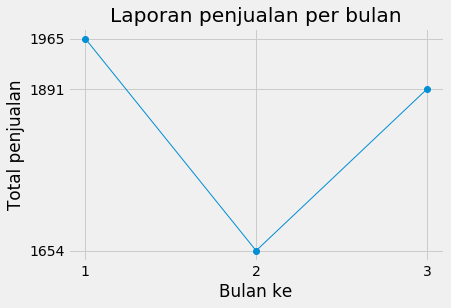

,Bulan,Jumlah penjualan
1,01,1965
2,02,1654
3,03,1891


In [14]:
cursor.execute('''select strftime('%m',tanggal_transaksi), sum(jumlah_pembelian) as total from transaksi
                group by strftime('%m', tanggal_transaksi)
                order by strftime('%m', tanggal_transaksi) ASC
                ''')
data = []
for row in cursor.fetchall():
    data.append(row)

np_data = np.array(data)

plt.plot([ int(x[0]) for x in np_data[:,:]], [ int(x[1]) for x in np_data[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_data[:,:]], [ int(x[0]) for x in np_data[:,:]])
plt.yticks([ int(x[1]) for x in np_data[:,:]], [ int(x[1]) for x in np_data[:,:]])
plt.xlabel('Bulan ke')
plt.ylabel('Total penjualan')
plt.title('Laporan penjualan per bulan')
plt.show()

df = pd.DataFrame([ x for x in np_data[:,:]])
df.columns = ['Bulan', 'Jumlah penjualan']
df.index = np.arange(1,len(df)+1)
df

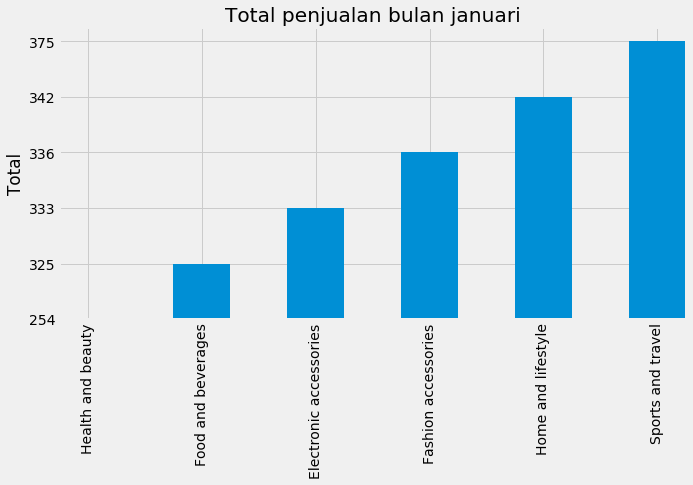

,Kategori,Total penjualan
1,Health and beauty,254
2,Food and beverages,325
3,Electronic accessories,333
4,Fashion accessories,336
5,Home and lifestyle,342
6,Sports and travel,375


In [15]:
cursor.execute('''select produk.product_line, sum(transaksi.jumlah_pembelian) as total
                from produk join transaksi on produk.id_produk = transaksi.id_produk 
                where strftime('%m', transaksi.tanggal_transaksi) = "01" 
                group by produk.product_line 
                order by total asc''')
data = []
for row in cursor.fetchall():
    data.append(row)
    
np_data = np.array(data)

objects = [x for x in np_data[:,0]]
performance = [x for x in np_data[:,1]]
y_pos = np.arange(len([x for x in np_data[:,0]]))
fig = plt.figure(figsize = (10, 5))
plt.ylabel('Total')
plt.bar(objects, performance, align='center', width=0.5)
plt.xticks(y_pos, objects, rotation = '90')
plt.title('Total penjualan bulan januari')
plt.margins(x=0)
plt.show()

df = pd.DataFrame([ x for x in np_data[:,:]])
df.columns = ['Kategori', 'Total penjualan']
df.index = np.arange(1,len(df)+1)
df

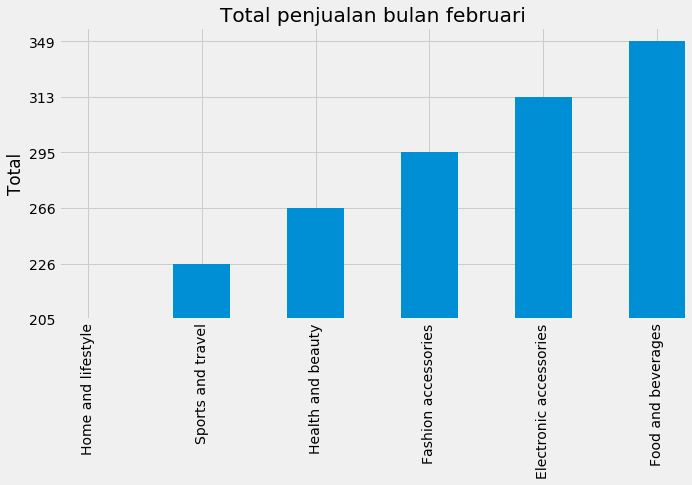

,Kategori,Total penjualan
1,Home and lifestyle,205
2,Sports and travel,226
3,Health and beauty,266
4,Fashion accessories,295
5,Electronic accessories,313
6,Food and beverages,349


In [16]:
cursor.execute('''select produk.product_line, sum(transaksi.jumlah_pembelian) as total
                from produk join transaksi on produk.id_produk = transaksi.id_produk 
                where strftime('%m', transaksi.tanggal_transaksi) = "02" 
                group by produk.product_line 
                order by total asc''')
data = []
for row in cursor.fetchall():
    data.append(row)
np_data = np.array(data)

objects = [x for x in np_data[:,0]]
performance = [x for x in np_data[:,1]]
y_pos = np.arange(len([x for x in np_data[:,0]]))
fig = plt.figure(figsize = (10, 5))
plt.ylabel('Total')
plt.bar(objects, performance, align='center', width=0.5)
plt.xticks(y_pos, objects, rotation = '90')
plt.title('Total penjualan bulan februari')
plt.margins(x=0)
plt.show()

df = pd.DataFrame([ x for x in np_data[:,:]])
df.columns = ['Kategori', 'Total penjualan']
df.index = np.arange(1,len(df)+1)
df

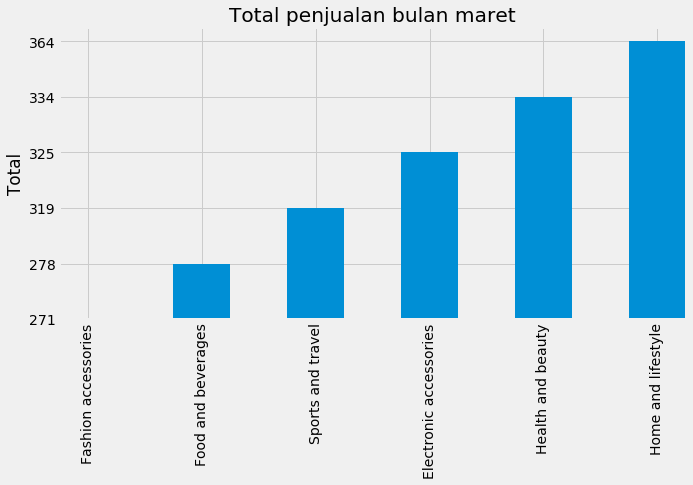

,Kategori,Total penjualan
1,Fashion accessories,271
2,Food and beverages,278
3,Sports and travel,319
4,Electronic accessories,325
5,Health and beauty,334
6,Home and lifestyle,364


In [17]:
cursor.execute('''select produk.product_line, sum(transaksi.jumlah_pembelian) as total
                from produk join transaksi on produk.id_produk = transaksi.id_produk 
                where strftime('%m', transaksi.tanggal_transaksi) = "03" 
                group by produk.product_line 
                order by total asc''')
data = []
for row in cursor.fetchall():
    data.append(row)
np_data = np.array(data)

objects = [x for x in np_data[:,0]]
performance = [x for x in np_data[:,1]]
y_pos = np.arange(len([x for x in np_data[:,0]]))
fig = plt.figure(figsize = (10, 5))
plt.ylabel('Total')
plt.bar(objects, performance, align='center', width=0.5)
plt.xticks(y_pos, objects, rotation = '90')
plt.title('Total penjualan bulan maret')
plt.margins(x=0)
plt.show()

df = pd.DataFrame([ x for x in np_data[:,:]])
df.columns = ['Kategori', 'Total penjualan']
df.index = np.arange(1,len(df)+1)
df